In [1]:
import pandas as pd

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import scipy

In [2]:
data_dir = 'Datasets/'
ww_use_df = pd.read_csv(data_dir + "tobacco_use_ww.csv")
stop_smoking_df = pd.read_csv(data_dir + "stop_smoking.csv")
death_df = pd.read_csv(data_dir + "death_rates_smoking_age.csv")
extra_ww_df = pd.read_csv("extra_ww.csv")

## Worldwide tobacco use

In [3]:
ww_use_df

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Year,Gender,Value
0,SEAR,South-East Asia,PRK,Democratic People's Republic of Korea,2018,Female,0.0
1,EUR,Europe,AZE,Azerbaijan,2018,Female,0.2
2,AFR,Africa,ERI,Eritrea,2018,Female,0.3
3,EMR,Eastern Mediterranean,EGY,Egypt,2018,Female,0.4
4,AFR,Africa,GHA,Ghana,2018,Female,0.4
...,...,...,...,...,...,...,...
4018,WPR,Western Pacific,TUV,Tuvalu,2000,Male,84.6
4019,AMR,Americas,JAM,Jamaica,2000,Female,9.1
4020,AFR,Africa,STP,Sao Tome and Principe,2000,Male,9.2
4021,EMR,Eastern Mediterranean,OMN,Oman,2000,Both sexes,9.5


In [4]:
def plot_country_use(country_name):
    country_df = ww_use_df[ww_use_df["Location"] == country_name]
    fig = px.line(country_df.query("Gender == 'Both sexes'"), x="Year", y="Value", markers=True, title=country_name)
    fig.show()


In [5]:
plot_country_use("Canada")

## Regulations

Notes

- We should compare cigarette tax with baseline taxes

In [6]:
stop_smoking_df

,Entity,Code,Year,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit
0,Algeria,DZA,2012,1.84,47.0,4,3
1,Algeria,DZA,2014,2.09,40.9,4,4
2,Argentina,ARG,2012,2.79,69.9,4,4
3,Argentina,ARG,2014,3.47,69.7,4,5
4,Armenia,ARM,2012,1.69,38.4,2,4
...,...,...,...,...,...,...,...
769,Yemen,YEM,2010,NaN,NaN,4,3
770,Zambia,ZMB,2007,NaN,NaN,2,3
771,Zambia,ZMB,2010,NaN,NaN,2,3
772,Zimbabwe,ZWE,2007,NaN,NaN,2,3


In [9]:
stop_smoking_df.describe()

,Year,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit
count,774.000000,208.000000,209.000000,774.000000,774.000000
mean,2010.755814,4.336394,57.339234,3.313953,3.493540
std,2.587373,2.534659,20.403278,1.088995,0.807042
min,2007.000000,0.000000,0.000000,2.000000,1.000000
25%,2010.000000,2.195000,42.900000,2.000000,3.000000
50%,2012.000000,4.155000,62.400000,4.000000,4.000000
75%,2013.500000,5.767500,75.200000,4.000000,4.000000
max,2014.000000,13.000000,86.400000,5.000000,5.000000


In [10]:
stop_smoking_df["HelpSize"] = (stop_smoking_df["HelpToQuit"] / 5.) ** 2

In [11]:
px.scatter(stop_smoking_df, x="AvgTaxesAsPctCigarettePrice", y="EnforceBansTobaccoAd", size="HelpSize", hover_name="Entity")

## Deaths

Notes
- China surprisingly low? underreported?

In [12]:
death_df.head()

,Entity,Code,Year,All_ages,Under_5,5_14,50_69,15_49,70_plus
0,Afghanistan,AFG,1990,63.895905,NaN,NaN,267.230009,16.589519,679.006755
1,Afghanistan,AFG,1991,61.846347,NaN,NaN,266.975516,15.456913,677.617648
2,Afghanistan,AFG,1992,53.436511,NaN,NaN,266.430053,12.767999,679.505810
3,Afghanistan,AFG,1993,47.044347,NaN,NaN,267.969428,11.000425,683.973588
4,Afghanistan,AFG,1994,45.799808,NaN,NaN,272.403687,10.738020,691.007773


In [13]:
death_df["Year"].min(), death_df["Year"].max()

(1990, 2017)

In [14]:
len(death_df["Entity"].unique())

231

In [15]:
countries = ["Canada", "China", "United States", "France", "Greece"]

In [16]:
px.line(death_df[death_df["Entity"].isin(countries)], x="Year", y="All_ages", color="Entity")

## Extra

In [17]:
extra_ww_df

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Year,Gender,Value,arg,cpi,edu,...,tax,LifeLadder,LogGDPPerCapita,SocialSupport,Expectancy,Freedom,Generosity,Corruption,PositiveAffect,NegativeAffect
0,SEAR,South-East Asia,PRK,Democratic People's Republic of Korea,2018,Female,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EUR,Europe,AZE,Azerbaijan,2018,Female,0.2,57.825393,152.900000,94.480080,...,7.987705,5.168,9.562,0.781,65.5,0.772,-0.232,0.561,0.593,0.191
2,AFR,Africa,ERI,Eritrea,2018,Female,0.3,75.168317,NaN,47.697109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EMR,Eastern Mediterranean,EGY,Egypt,2018,Female,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFR,Africa,GHA,Ghana,2018,Female,0.4,64.967654,231.807235,71.319687,...,6.569099,5.004,8.555,0.761,57.2,0.817,0.062,0.846,0.747,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018,WPR,Western Pacific,TUV,Tuvalu,2000,Male,84.6,66.666667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4019,AMR,Americas,JAM,Jamaica,2000,Female,9.1,44.228994,34.041977,85.287460,...,10.929125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4020,AFR,Africa,STP,Sao Tome and Principe,2000,Male,9.2,51.041667,22.349333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4021,EMR,Eastern Mediterranean,OMN,Oman,2000,Both sexes,9.5,3.789984,74.767613,78.232674,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Effect of regulation on tobacco usage (no baseline)

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

In [22]:
def draw_tax_plot(reg_use_df, parent_location=None, save=None):
    if parent_location == "ALL":
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        min_y = reg_use_df["Pct_Smoking"].min()
        max_y = reg_use_df["Pct_Smoking"].max()
        for i, area in enumerate(reg_use_df["ParentLocation"].unique()):
            area_df = reg_use_df.query(f"ParentLocation == '{area}'")
            row = i // 3
            col = i % 3
            sns.scatterplot(ax=axes[row][col], data=area_df, x="AvgTaxesAsPctCigarettePrice", y="Pct_Smoking")
            sns.regplot(ax=axes[row][col], data=area_df, x="AvgTaxesAsPctCigarettePrice", y="Pct_Smoking", ci=None)
            axes[row][col].set_xlabel(area)
            axes[row][col].set_ylim(min_y, max_y)
    else:
        if parent_location is not None:
            reg_use_df = reg_use_df.query(f"ParentLocationCode == '{parent_location}'")
        fig, axes = plt.subplots(1, 1, figsize=(6, 5))
        sns.scatterplot(ax=axes, data=reg_use_df, x="AvgTaxesAsPctCigarettePrice", y="Pct_Smoking")
        sns.regplot(ax=axes, data=reg_use_df, x="AvgTaxesAsPctCigarettePrice", y="Pct_Smoking", ci=None)

    if save is not None:
        fig.savefig(f"plots/{save}")

def draw_ads_plot(reg_use_df, parent_location=None, save=None):
    if parent_location == "ALL":
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        min_y = reg_use_df["Pct_Smoking"].min()
        max_y = reg_use_df["Pct_Smoking"].max()
        for i, area in enumerate(reg_use_df["ParentLocation"].unique()):
            area_df = reg_use_df.query(f"ParentLocation == '{area}'")
            row = i // 3
            col = i % 3
            sns.barplot(ax=axes[row][col], data=area_df, x="EnforceBansTobaccoAd", y="Pct_Smoking", ci=68)
            axes[row][col].set_xlabel(area)
            axes[row][col].set_ylim(min_y, max_y)
    else:
        if parent_location is not None:
            reg_use_df = reg_use_df.query(f"ParentLocationCode == '{parent_location}'")
        fig, axes = plt.subplots(1, 1, figsize=(6, 5))
        sns.barplot(ax=axes, data=reg_use_df, x="EnforceBansTobaccoAd", y="Pct_Smoking", ci=68)

    if save is not None:
        fig.savefig(f"plots/{save}")

def draw_help_plot(reg_use_df, parent_location=None, save=None):
    if parent_location == "ALL":
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        min_y = reg_use_df["Pct_Smoking"].min()
        max_y = reg_use_df["Pct_Smoking"].max()
        for i, area in enumerate(reg_use_df["ParentLocation"].unique()):
            area_df = reg_use_df.query(f"ParentLocation == '{area}'")
            row = i // 3
            col = i % 3
            sns.barplot(ax=axes[row][col], data=area_df, x="HelpToQuit", y="Pct_Smoking", ci=68)
            axes[row][col].set_xlabel(area)
            axes[row][col].set_ylim(min_y, max_y)
    else:
        if parent_location is not None:
            reg_use_df = reg_use_df.query(f"ParentLocationCode == '{parent_location}'")
        fig, axes = plt.subplots(1, 1, figsize=(6, 5))
        sns.barplot(ax=axes, data=reg_use_df, x="HelpToQuit", y="Pct_Smoking", ci=68)

    if save is not None:
        fig.savefig(f"plots/{save}")

In [23]:
def merge_reg_use(reg_df, use_df, year_delay=1):
    reg_df = reg_df.copy()
    use_df = use_df.copy()

    use_df = use_df.rename(columns={"SpatialDimValueCode": "Code", "Value": "Pct_Smoking"}).query("Gender == 'Both sexes'")
    use_df = use_df[use_df["Year"] == 2018]
    reg_df = reg_df[reg_df["Year"] == 2014]
    # reg_df["EffectiveYear"] = reg_df["Year"] + year_delay

    reg_use_df = pd.merge(reg_df, use_df, left_on="Code", right_on="Code")
    return reg_use_df


In [24]:
reg_use_df = merge_reg_use(stop_smoking_df, ww_use_df, year_delay=1)
reg_use_df

,Entity,Code,Year_x,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit,HelpSize,ParentLocationCode,ParentLocation,Location,Year_y,Gender,Pct_Smoking
0,Algeria,DZA,2014,2.09,40.9,4,4,0.64,AFR,Africa,Algeria,2018,Both sexes,18.8
1,Argentina,ARG,2014,3.47,69.7,4,5,1.00,AMR,Americas,Argentina,2018,Both sexes,21.8
2,Armenia,ARM,2014,1.74,44.1,2,4,0.64,EUR,Europe,Armenia,2018,Both sexes,26.7
3,Australia,AUS,2014,10.64,58.4,4,5,1.00,WPR,Western Pacific,Australia,2018,Both sexes,16.2
4,Austria,AUT,2014,5.34,74.9,4,4,0.64,EUR,Europe,Austria,2018,Both sexes,29.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Timor,TLS,2014,NaN,NaN,2,2,0.16,SEAR,South-East Asia,Timor-Leste,2018,Both sexes,38.2
145,Togo,TGO,2014,NaN,NaN,5,2,0.16,AFR,Africa,Togo,2018,Both sexes,7.6
146,Tonga,TON,2014,NaN,NaN,4,4,0.64,WPR,Western Pacific,Tonga,2018,Both sexes,30.2
147,Tuvalu,TUV,2014,NaN,NaN,5,4,0.64,WPR,Western Pacific,Tuvalu,2018,Both sexes,48.7


Question: Do countries with higher taxes on cigarettes have lower percentage of smokers?

Graph: Percent of smokers in a country after an onset period vs taxes imposed on cigarettes.

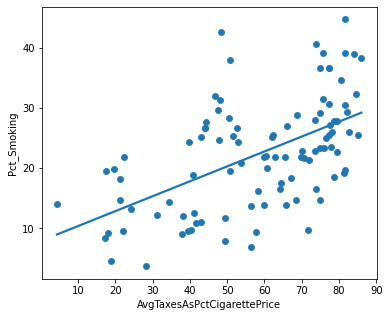

In [25]:
# fig = px.scatter(reg_use_df, x="AvgTaxesAsPctCigarettePrice", y="Pct_Smoking", trendline="ols")
# fig.show()
# fig.write_image("plots/tax_no_norm.png")
draw_tax_plot(reg_use_df, save="tax_no_norm.png")

In [26]:
clean_df = reg_use_df.dropna(subset=["AvgTaxesAsPctCigarettePrice", "Pct_Smoking"])
scipy.stats.pearsonr(clean_df["AvgTaxesAsPctCigarettePrice"], clean_df["Pct_Smoking"])

(0.5463138984072795, 4.11814402056638e-09)

Question: Do countries with stricter regulation on cigarette ads have a lower percentage of smokers?

Graph: Percent of smokers in a country after an onset period vs ban on cigarette ads.

In [27]:
ban_df = reg_use_df.groupby("EnforceBansTobaccoAd").mean()
ban_df["Smoking_Std"] = reg_use_df.groupby("EnforceBansTobaccoAd").std()["Pct_Smoking"]

px.bar(ban_df, x=ban_df.index, y="Pct_Smoking", title="Percent Smoker vs. Ads ban", error_y="Smoking_Std")

In [28]:
help_df = reg_use_df.groupby("HelpToQuit").mean()
help_df["Smoking_Std"] = reg_use_df.groupby("HelpToQuit").std()["Pct_Smoking"]
px.bar(help_df, x=help_df.index, y="Pct_Smoking", error_y="Smoking_Std")

## Looking at consistency of policy across years

In [29]:
px.histogram(stop_smoking_df.groupby("Entity").std()["EnforceBansTobaccoAd"])

In [30]:
px.histogram(stop_smoking_df.groupby("Entity").std()["AvgTaxesAsPctCigarettePrice"])

## Effect of regulation on tobacco usage (self baseline)

Take tobacco usage in 2018 and subtract by the value in 2000.
Average the regulation since there is little variance for most countries.

In [31]:
def merge_reg_use_with_self_baseline(reg_df, use_df):
    reg_df = reg_df.copy()
    use_df = use_df.copy()

    use_df = use_df.rename(columns={"SpatialDimValueCode": "Code", "Value": "Pct_Smoking"}).query("Gender == 'Male'")
    recent_use_df = use_df[use_df["Year"] == 2018]
    baseline_use_df = use_df[use_df["Year"] == 2000][["Code", "Pct_Smoking"]]
    recent_use_df = pd.merge(recent_use_df, baseline_use_df, on="Code")
    recent_use_df["Pct_Smoking"] = (recent_use_df["Pct_Smoking_x"] - recent_use_df["Pct_Smoking_y"]) / recent_use_df["Pct_Smoking_y"]

    # taxe_price_df = reg_df.groupby("Code").mean()[["AvgTaxesAsPctCigarettePrice", "AvgCigarettePriceDollars"]]
    # ad_ban_df = reg_df.groupby("Code").median()[["EnforceBansTobaccoAd"]]
    # reg_df = pd.merge(taxe_price_df, ad_ban_df, on="Code")
    reg_df = reg_df[reg_df["Year"] == 2014]

    # Normalizing values
    # baseline_reg_df = use_df.groupby("Code").mean()[["tax"]]
    # reg_df = pd.merge(reg_df, baseline_reg_df, on="Code")
    # reg_df["NormalizedCigaretteTax"] = reg_df["AvgTaxesAsPctCigarettePrice"] - reg_df["tax"]
    # reg_df.drop(columns="tax", inplace=True)

    reg_use_df = pd.merge(reg_df, recent_use_df, on="Code")
    return reg_use_df

In [32]:
reg_use_df = merge_reg_use_with_self_baseline(stop_smoking_df, extra_ww_df)
reg_use_df

,Entity,Code,Year_x,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit,HelpSize,ParentLocationCode,ParentLocation,...,LogGDPPerCapita,SocialSupport,Expectancy,Freedom,Generosity,Corruption,PositiveAffect,NegativeAffect,Pct_Smoking_y,Pct_Smoking
0,Algeria,DZA,2014,2.09,40.9,4,4,0.64,AFR,Africa,...,9.348,0.799,65.9,0.583,-0.146,0.759,0.591,0.293,42.4,-0.143868
1,Argentina,ARG,2014,3.47,69.7,4,5,1.00,AMR,Americas,...,10.032,0.900,68.8,0.846,-0.211,0.855,0.820,0.321,53.5,-0.472897
2,Armenia,ARM,2014,1.74,44.1,2,4,0.64,EUR,Europe,...,9.451,0.814,66.9,0.808,-0.163,0.677,0.581,0.455,66.1,-0.216339
3,Australia,AUS,2014,10.64,58.4,4,5,1.00,WPR,Western Pacific,...,10.811,0.940,73.6,0.916,0.146,0.405,0.759,0.187,29.9,-0.374582
4,Austria,AUT,2014,5.34,74.9,4,4,0.64,EUR,Europe,...,10.928,0.912,73.0,0.904,0.053,0.523,0.752,0.226,53.0,-0.426415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Timor,TLS,2014,NaN,NaN,2,2,0.16,SEAR,South-East Asia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,-0.276923
145,Togo,TGO,2014,NaN,NaN,5,2,0.16,AFR,Africa,...,7.348,0.596,54.7,0.612,-0.007,0.809,0.608,0.446,19.1,-0.293194
146,Tonga,TON,2014,NaN,NaN,4,4,0.64,WPR,Western Pacific,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.8,-0.065637
147,Tuvalu,TUV,2014,NaN,NaN,5,4,0.64,WPR,Western Pacific,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.6,-0.219858


In [33]:
# Random visualization of change in smoking rate by area
# recent_use_df_by_area = reg_use_df.groupby("ParentLocation").mean()
# px.bar(recent_use_df_by_area, x=recent_use_df_by_area.index, y="Pct_Smoking")

In [34]:
# reg_df_by_area = reg_use_df.groupby("ParentLocation").mean()
# px.bar(reg_df_by_area, x=reg_df_by_area.index, y="AvgTaxesAsPctCigarettePrice")

Change in percentage of smokers from 2000-2018 as a function of average tax percentage

Observations:
- Slight correlation between taxes and smoking rate
- Taxes not very effective?

Note:
- Normalize against tax rate

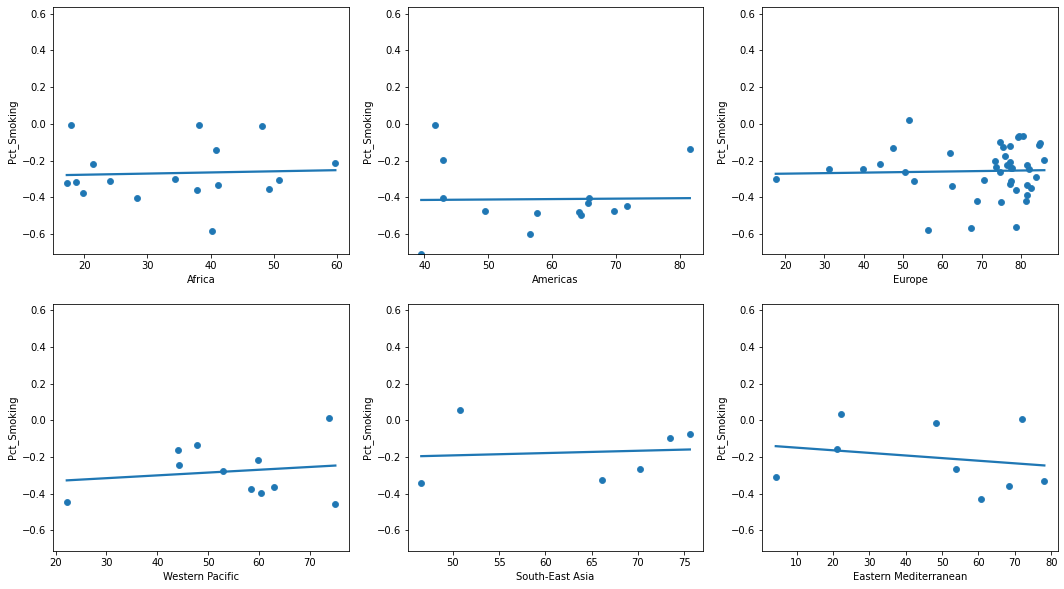

In [35]:
draw_tax_plot(reg_use_df, parent_location="ALL", save="tax_time_norm_ALL.png")

Percent change in smoking rate as a function of median tobacco ad ban

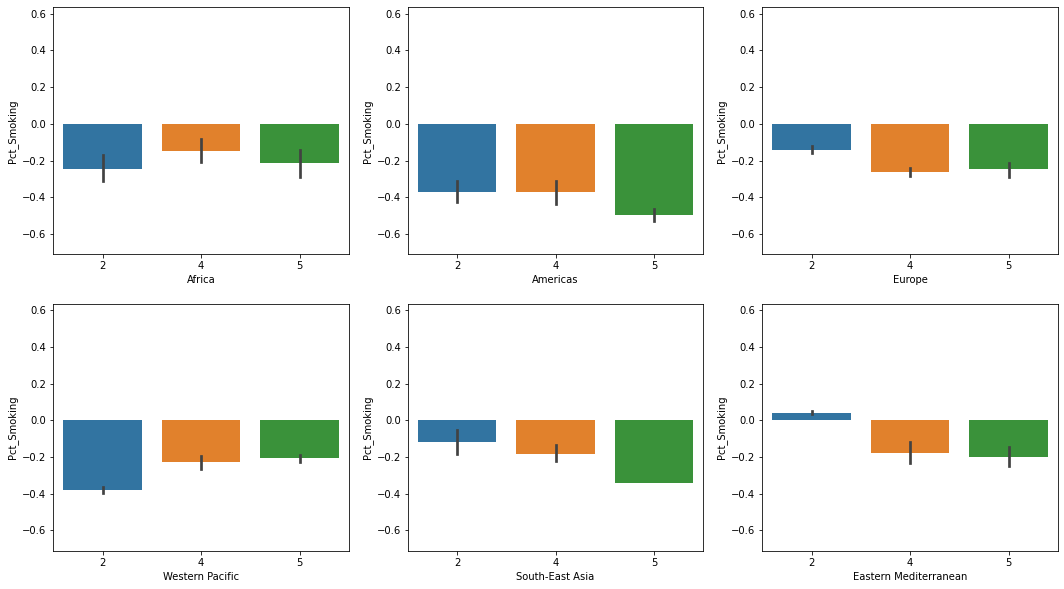

In [36]:
draw_ads_plot(reg_use_df, parent_location="ALL", save="ads_time_norm_ALL.png")

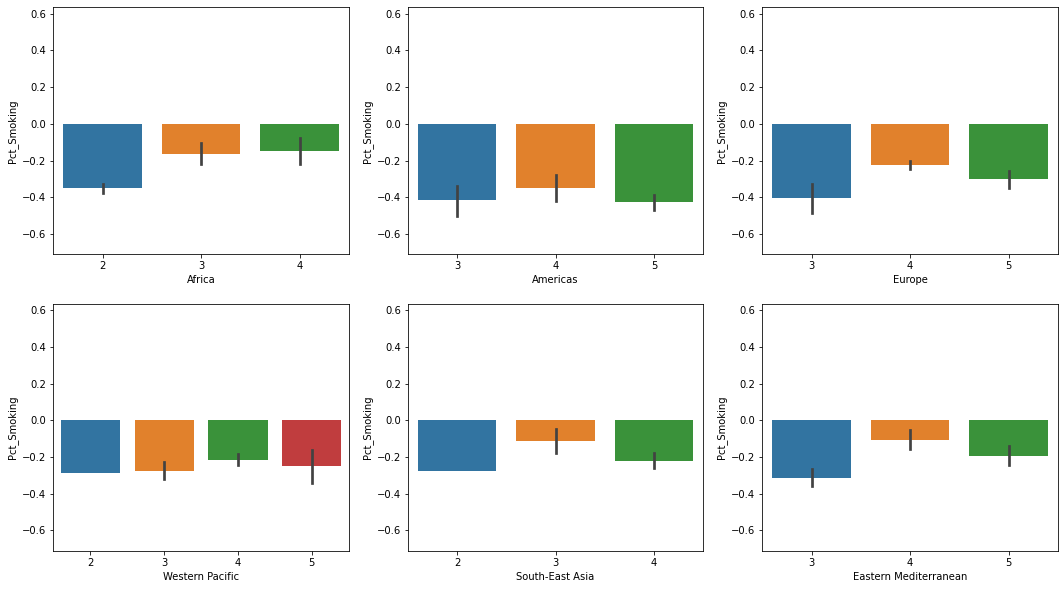

In [37]:
draw_help_plot(reg_use_df, parent_location="ALL")

## Effect of regulation on tobacco usage (region baseline)

In [38]:
def normalize_by_area(df):
    area_df = df.groupby("ParentLocationCode").mean()[["Pct_Smoking"]].rename(columns={"Pct_Smoking": "Baseline_Smoking"})
    df = pd.merge(df, area_df, on="ParentLocationCode")
    df["Pct_Smoking"] = (df["Pct_Smoking"] - df["Baseline_Smoking"])
    df.drop(columns="Baseline_Smoking", inplace=True)
    return df

def merge_reg_use_with_area_baseline(reg_df, use_df):
    reg_df = reg_df.copy()
    use_df = use_df.copy()

    use_df = use_df.rename(columns={"SpatialDimValueCode": "Code", "Value": "Pct_Smoking"}).query("Gender == 'Male'")
    recent_use_df = use_df[use_df["Year"] == 2018]
    # baseline_use_df = use_df[use_df["Year"] == 2000]

    # Normalizing by area
    recent_use_df = normalize_by_area(recent_use_df)
    # baseline_use_df = normalize_by_area(baseline_use_df)
    # baseline_use_df = baseline_use_df[["Code", "Pct_Smoking"]]

    # recent_use_df = pd.merge(recent_use_df, baseline_use_df, on="Code")
    # recent_use_df["Pct_Smoking_Change"] = (recent_use_df["Pct_Smoking_x"] - recent_use_df["Pct_Smoking_y"]) / recent_use_df["Pct_Smoking_y"]

    reg_df = reg_df[reg_df["Year"] == 2014]

    # Normalizing values
    # baseline_reg_df = use_df.query("Year == 2014")[["Code", "tax"]].rename(columns={"Code": "tmp_code"})
    # reg_df = pd.merge(reg_df, baseline_reg_df, left_on="Code", right_on="tmp_code").drop(columns="tmp_code")
    # reg_df["NormalizedCigaretteTax"] = reg_df["AvgTaxesAsPctCigarettePrice"] - reg_df["tax"]
    # reg_df.drop(columns="tax", inplace=True)

    reg_use_df = pd.merge(reg_df, recent_use_df, on="Code")
    return reg_use_df

In [39]:
reg_use_df = merge_reg_use_with_area_baseline(stop_smoking_df, extra_ww_df)
reg_use_df

,Entity,Code,Year_x,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit,HelpSize,ParentLocationCode,ParentLocation,...,tax,LifeLadder,LogGDPPerCapita,SocialSupport,Expectancy,Freedom,Generosity,Corruption,PositiveAffect,NegativeAffect
0,Algeria,DZA,2014,2.09,40.9,4,4,0.64,AFR,Africa,...,NaN,5.043,9.348,0.799,65.9,0.583,-0.146,0.759,0.591,0.293
1,Argentina,ARG,2014,3.47,69.7,4,5,1.00,AMR,Americas,...,7.585677,5.793,10.032,0.900,68.8,0.846,-0.211,0.855,0.820,0.321
2,Armenia,ARM,2014,1.74,44.1,2,4,0.64,EUR,Europe,...,11.753299,5.062,9.451,0.814,66.9,0.808,-0.163,0.677,0.581,0.455
3,Australia,AUS,2014,10.64,58.4,4,5,1.00,WPR,Western Pacific,...,5.838860,7.177,10.811,0.940,73.6,0.916,0.146,0.405,0.759,0.187
4,Austria,AUT,2014,5.34,74.9,4,4,0.64,EUR,Europe,...,13.320046,7.396,10.928,0.912,73.0,0.904,0.053,0.523,0.752,0.226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Timor,TLS,2014,NaN,NaN,2,2,0.16,SEAR,South-East Asia,...,5.333911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,Togo,TGO,2014,NaN,NaN,5,2,0.16,AFR,Africa,...,10.090436,4.023,7.348,0.596,54.7,0.612,-0.007,0.809,0.608,0.446
146,Tonga,TON,2014,NaN,NaN,4,4,0.64,WPR,Western Pacific,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,Tuvalu,TUV,2014,NaN,NaN,5,4,0.64,WPR,Western Pacific,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
reg_use_df.groupby("ParentLocationCode").count()

,Entity,Code,Year_x,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit,HelpSize,ParentLocation,Location,...,tax,LifeLadder,LogGDPPerCapita,SocialSupport,Expectancy,Freedom,Generosity,Corruption,PositiveAffect,NegativeAffect
ParentLocationCode,,,,,,,,,,,,,,,,,,,,,
AFR,37,37,37,16,17,37,37,37,37,37,...,21,28,28,28,28,28,28,28,28,28
AMR,20,20,20,14,14,20,20,20,20,20,...,13,13,13,13,13,13,13,13,13,13
EMR,14,14,14,9,9,14,14,14,14,14,...,5,7,7,7,7,7,7,5,7,7
EUR,47,47,47,43,43,47,47,47,47,47,...,41,39,39,39,39,39,39,39,39,39
SEAR,9,9,9,6,6,9,9,9,9,9,...,7,7,7,7,7,7,7,7,7,7
WPR,22,22,22,11,11,22,22,22,22,22,...,11,9,9,9,9,9,9,7,9,9


In [41]:
reg_use_df.ParentLocationCode.unique()

array(['AFR', 'AMR', 'EUR', 'WPR', 'SEAR', 'EMR'], dtype=object)

In [42]:
reg_use_df.ParentLocation.unique()

array(['Africa', 'Americas', 'Europe', 'Western Pacific',
       'South-East Asia', 'Eastern Mediterranean'], dtype=object)

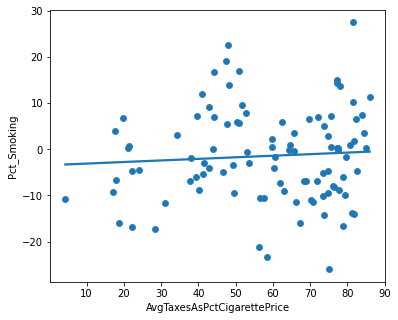

In [43]:
draw_tax_plot(reg_use_df, save="tax_area_norm.png")

In [44]:
clean_df = reg_use_df.dropna(subset=["AvgTaxesAsPctCigarettePrice", "Pct_Smoking"])
scipy.stats.pearsonr(clean_df["AvgTaxesAsPctCigarettePrice"], clean_df["Pct_Smoking"])

(0.0688745878350221, 0.4959374016597878)

We observe that taxes have different effects depending on the ParentLocation
More specifically, in some Asian countries, higher taxes is correlated with a lower smoking rate
We hypothesize that this may be due to cultural differences (e.g. different types of government, whether people are willing to listen to the government, etc.)

Not enough data

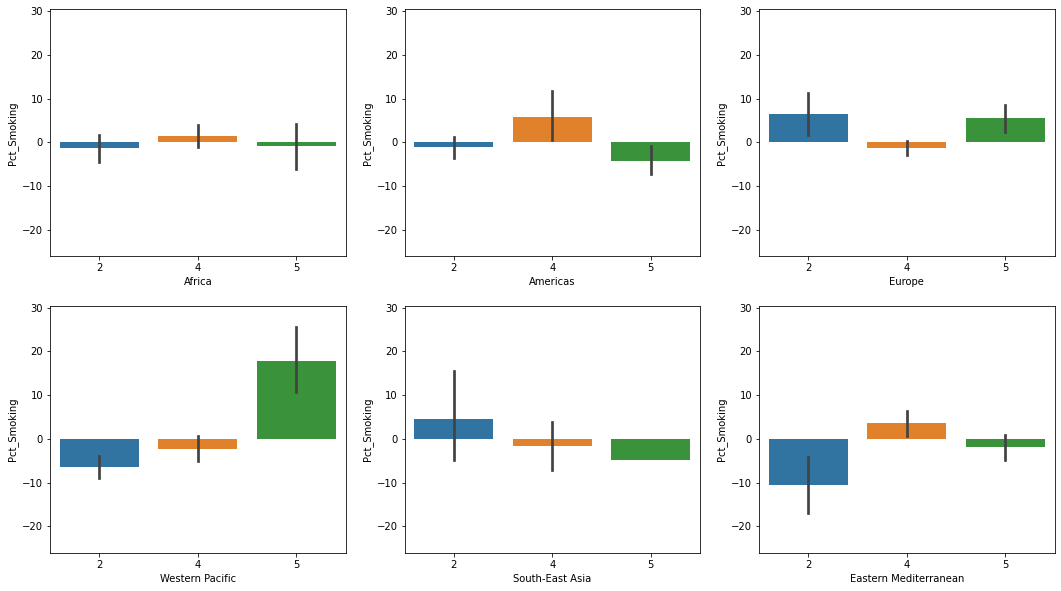

In [45]:
draw_ads_plot(reg_use_df, parent_location="ALL", save="ads_area_norm_ALL.png")

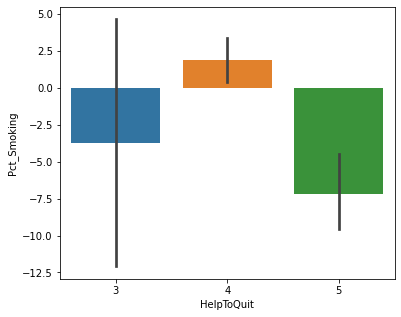

In [46]:
draw_help_plot(reg_use_df, parent_location="EUR")